# Titanic: Machine Learning from Disaster
Titanic のデータでデータ分析に慣れます

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## データの読み込み

In [2]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## データを眺める

In [7]:
df = pd.concat([train, test], sort=True)
df.shape

(1309, 12)

In [8]:
df.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

### 各 column の説明

| column | 説明 |
| --- | --- |
| Age | 年齢 |
| Cabin | 客席番号 |
| Embarked | 乗船した港 |
| Fare | 運賃 |
| Name | 名前 |
| Parch | 同乗した親/子供の数 |
| PassengerID | 乗客番号 |
| Pclass | 座席のクラス(1st class ~ 3rd class) |
| Sibsp | 同乗した兄弟/配偶者の数 |
| Survived | 生存者か否か(0, 1) |
| Ticket | チケット番号 |

ぱっと見不要そうな特徴
 - Cabin
 - PassengerID
 - Ticket


In [9]:
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [10]:
# 欠損値埋め
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
#　行の削除
df.drop(columns=['Cabin', 'Ticket'], inplace=True)

In [11]:
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [12]:
emb = {'S': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(lambda x: emb[x])

In [13]:
df['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [14]:
df['is_male'] = (df['Sex']=='male').astype(int)
df.drop(columns=['Sex'], inplace=True)

In [15]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

In [16]:
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [17]:
df["NameLength"]=df["Name"].map(lambda x: len(x))
df.drop(columns=['Name'], inplace=True)

In [18]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Capt          1
Sir           1
Don           1
Countess      1
Dona          1
Mme           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [19]:
def title_xfer(title):
    titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4}
    if title in titles:
        return titles[title]
    else:
        return 0

df['Title'] = df['Title'].map(title_xfer)

In [20]:
# 確認
df.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,is_male,Title,NameLength
0,22.0,0,7.2500,0,1,3,1,0.0,1,1,23
1,38.0,1,71.2833,0,2,1,1,1.0,0,3,51
2,26.0,0,7.9250,0,3,3,0,1.0,0,2,22
3,35.0,0,53.1000,0,4,1,1,1.0,0,3,44
4,35.0,0,8.0500,0,5,3,0,0.0,1,1,24


In [21]:
df.dtypes

Age            float64
Embarked         int64
Fare           float64
Parch            int64
PassengerId      int64
Pclass           int64
SibSp            int64
Survived       float64
is_male          int64
Title            int64
NameLength       int64
dtype: object

数値に変換できている

## EDA

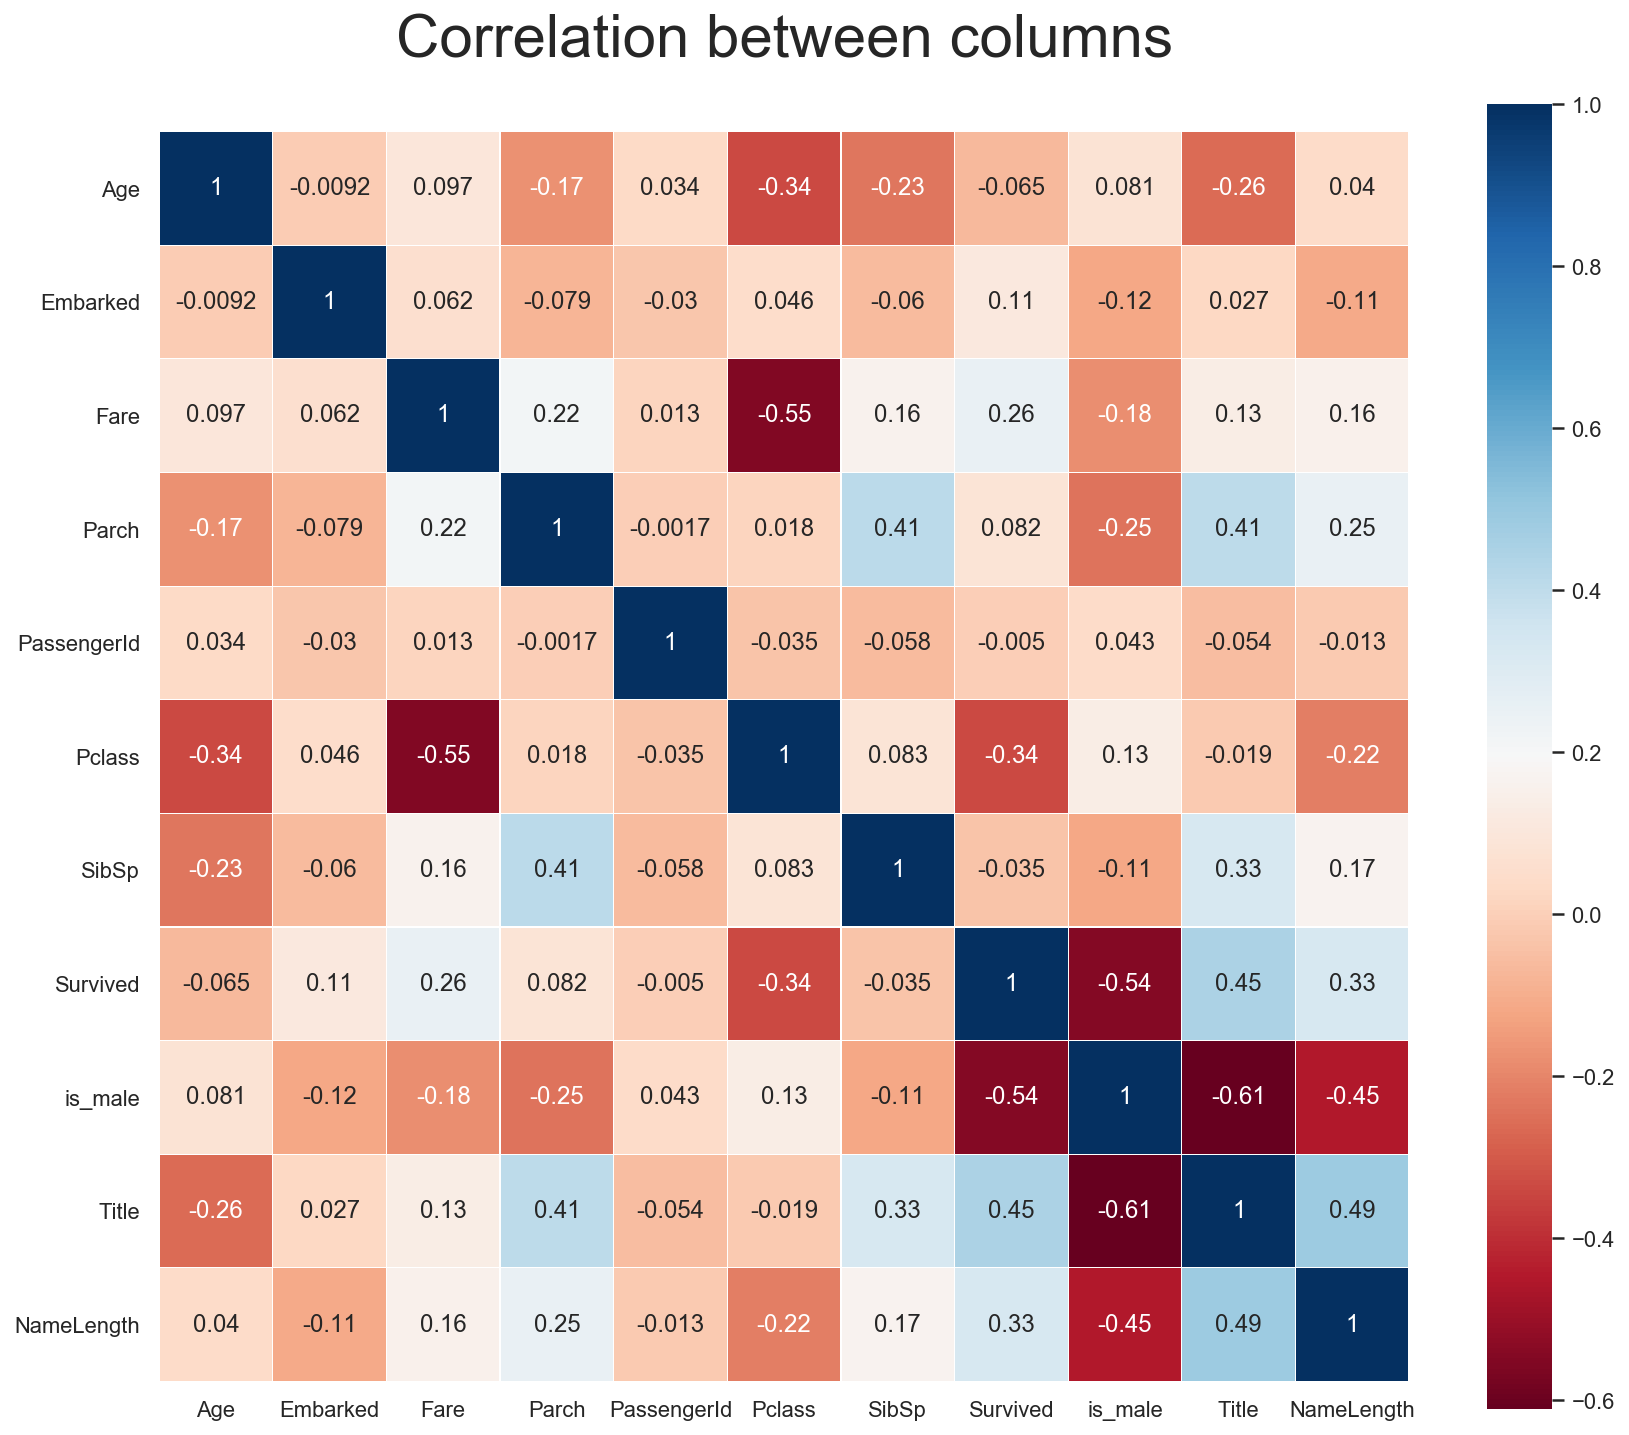

In [22]:
%config InlineBackend.figure_formats = {'png', 'retina'}
sns.set(style="whitegrid")

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Correlation between columns', y=1.05, size=30)
sns.heatmap(df[df['PassengerId'] < 892].astype(float).corr(), linewidth=0.1, cmap=colormap, vmax=1.0, square=True, annot=True)
plt.show()

### Survived と直接関係ありそうな column
- Fare
- Pclass
- is_male
- Title
- NameLength

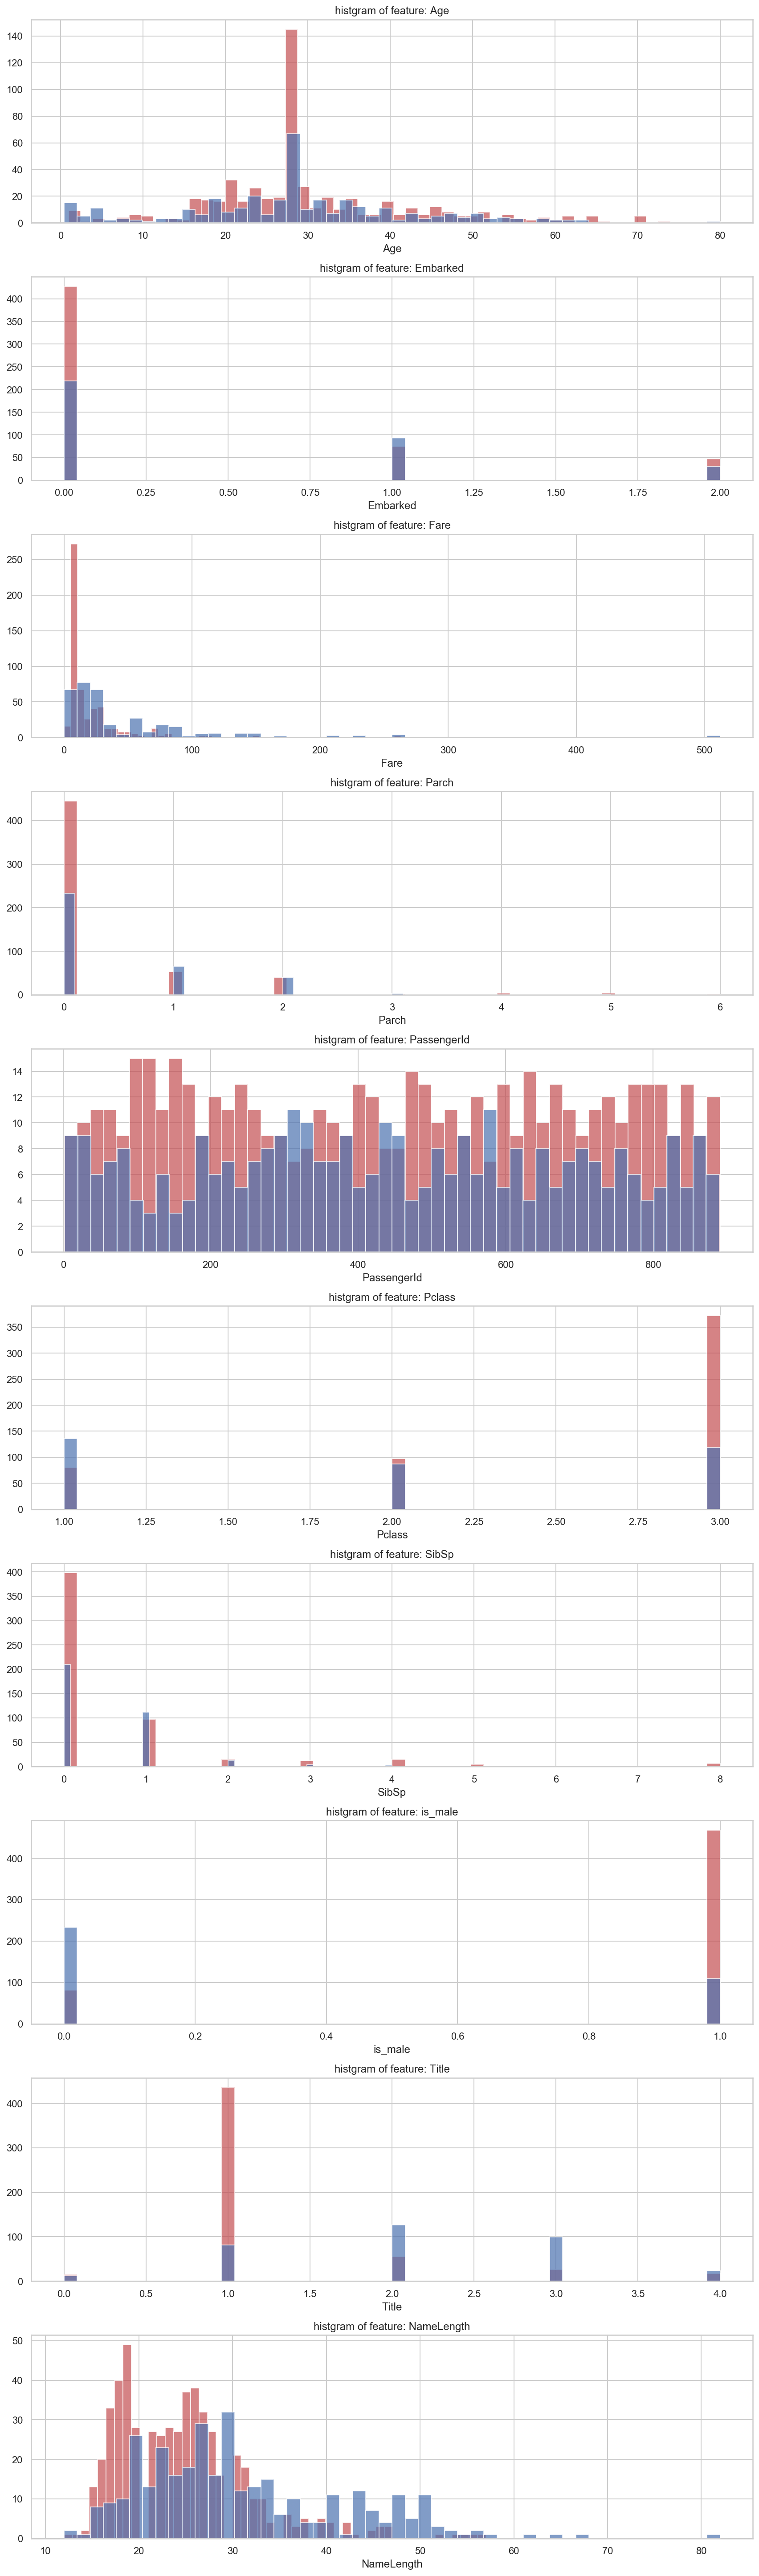

In [23]:
# Survived で色分けしたヒストグラムを書く
plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df.drop(columns=['Survived'])):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df['Survived'] == 0], bins=50, color='r', hist_kws={'alpha': 0.7}, kde=False)
    sns.distplot(df[cn][df['Survived'] == 1], bins=50, color='b', hist_kws={'alpha': 0.7}, kde=False)
    ax.set_title('histgram of feature: ' + str(cn))
    plt.tight_layout()
plt.show()

## 気づいたこと
- 子供の生存率が高い（Age<17）
- 運賃が安い客(Fare<40くらい)はだいぶ見捨てられいる
- sibspもparchも, 1以上だとだいぶ生存率が高い
    - 独り身だと死ぬ！
    
以下自分の考察
- Embarkedが0(S)の人は死にやすい
- titleが1(Mr)の人は死にやすい
    - これは男性の死にやすさと相関ありそう
    - でも地位とかも関係してくるかな？
- NameLengthが短いと（<32?）死にやすい

以下検証

In [24]:
df[df['Age'] < 16]['Survived'].mean()

0.5903614457831325

In [25]:
df[df['Age'] >= 17]['Survived'].mean()

0.36283185840707965

In [26]:
df[df['Fare'] < 40]['Survived'].mean()

0.3202797202797203

In [27]:
df[df['Fare'] >= 40]['Survived'].mean()

0.6420454545454546

In [28]:
df[(df["SibSp"] == 0) & (df["Parch"] == 0)]["Survived"].mean()

0.30353817504655495

In [29]:
df[(df["SibSp"] != 0) | (df["Parch"] != 0)]["Survived"].mean()

0.5056497175141242

In [30]:
df[df['Embarked'] == 0]['Survived'].mean()

0.33900928792569657

In [31]:
df[df['Embarked'] != 0]['Survived'].mean()

0.5020408163265306

In [32]:
df[df['Title'] == 1]['Survived'].mean()

0.15667311411992263

In [33]:
df[df['Title'] != 1]['Survived'].mean()

0.6978609625668449

In [34]:
df[df['NameLength'] <= 32]['Survived'].mean()

0.3157894736842105

In [35]:
df[df['NameLength'] > 32]['Survived'].mean()

0.6745562130177515

In [120]:
# 16歳未満なら1
df['u_16'] = 0
df.loc[df['Age'] < 16, 'u_16'] = 1
#　Fare　が４０未満なら1
df['is_cheap'] = 0
df.loc[df['Fare'] < 40, 'is_cheap'] = 1
# 家族がいなかったら1
df['is_alone'] = 0
df.loc[(df['SibSp'] == 0) & (df['Parch'] == 0), 'is_alone'] = 1
# 家族の人数
df['family_size'] = df['SibSp'] + df['Parch'] + 1

# Embarkedが0(S)なら1
#df['is_S'] = 0
#df.loc[df['Embarked'] == 0, 'is_S'] = 1
# TitleがMrなら１
#df['is_Mr'] = 0
#df.loc[df['Title'] == 1, 'is_Mr'] = 1
#NameLengthが32以下なら１
#df['has_short_name'] = 0
#df.loc[df['NameLength'] <= 32, 'has_short_name'] = 1

In [121]:
df.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,is_male,Title,NameLength,u_16,is_cheap,is_alone,family_size,is_Mr,is_S,has_short_name
0,22.0,0,7.2500,0,1,3,1,0.0,1,1,23,0,1,0,2,1,1,1
1,38.0,1,71.2833,0,2,1,1,1.0,0,3,51,0,0,0,2,0,0,0
2,26.0,0,7.9250,0,3,3,0,1.0,0,2,22,0,1,1,1,0,1,1
3,35.0,0,53.1000,0,4,1,1,1.0,0,3,44,0,0,0,2,0,1,0
4,35.0,0,8.0500,0,5,3,0,0.0,1,1,24,0,1,1,1,1,1,1


## 学習

In [122]:
train = df[df['PassengerId'] < 892]
test = df[df['PassengerId'] >= 892].drop(columns=['Survived'])

In [123]:
train.shape

(891, 18)

In [124]:
test.shape

(418, 17)

In [125]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=100)

In [126]:
train_X = np.array(train[train["PassengerId"]<=600].drop(columns=["Survived"]))
train_y = np.array(train[train["PassengerId"]<=600]["Survived"])

test_X = np.array(train[train["PassengerId"]>600].drop(columns=["Survived"]))
test_y = np.array(train[train["PassengerId"]>600]["Survived"])

In [127]:
rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

## 評価

In [128]:
accuracy_score(pred_y,test_y)

0.8419243986254296

In [129]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=100)

rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

accuracy_score(pred_y,test_y)

0.8281786941580757

In [130]:
rfc = RandomForestClassifier(n_estimators=70, max_depth=10, random_state=100)

rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

accuracy_score(pred_y,test_y)

0.8247422680412371

In [131]:
rfc = RandomForestClassifier(n_estimators=70, max_depth=10, random_state=100)

rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

accuracy_score(pred_y,test_y)

0.8247422680412371

In [132]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=110)

scores = cross_val_score(rfc, train_X, train_y, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.03)


In [133]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=110)

scores = cross_val_score(rfc, train_X, train_y, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.03)


## Output

In [134]:
train_X = np.array(train.drop(columns=["Survived"]))
train_y = np.array(train["Survived"])

test_X = np.array(test.sort_values("PassengerId"))

In [135]:
rfc.fit(train_X,train_y)
pred_y = rfc.predict(test_X)

In [136]:
pred_y

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.